In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline
# statistical packages

import warnings
warnings.filterwarnings("ignore") # turn off warnings

In [4]:
df=pd.read_excel("Data.xlsx") #reading the data file

In [5]:
df.head() #checking if everything is ok

,CNTRY,CODE,GDPPC,UNMP,CLIMATE,SUIC,URB,LGGDP,LGUN,LGURB,COMM,LOGSUIC,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Luxembourg,LUX,113625.132900,5.85,0,14.7,89.574,11.640668,1.766443,4.495068,0,2.687847,NaN,NaN,NaN,NaN
1,Norway,NOR,102913.450844,3.42,1,12.4,80.286,11.541651,1.229641,4.385598,0,2.517696,NaN,NaN,NaN,NaN
2,Switzerland,CHE,85112.464398,4.75,0,17.1,73.674,11.351736,1.558146,4.299653,0,2.839078,NaN,NaN,NaN,NaN
3,Qatar,QAT,85050.866345,0.28,0,6.5,98.785,11.351012,-1.272967,4.592949,0,1.871802,NaN,NaN,NaN,NaN
4,Australia,AUS,68150.107041,5.66,0,13.8,85.502,11.129475,1.733425,4.448543,0,2.624669,NaN,NaN,NaN,NaN


Text(0, 0.5, 'SUIC')

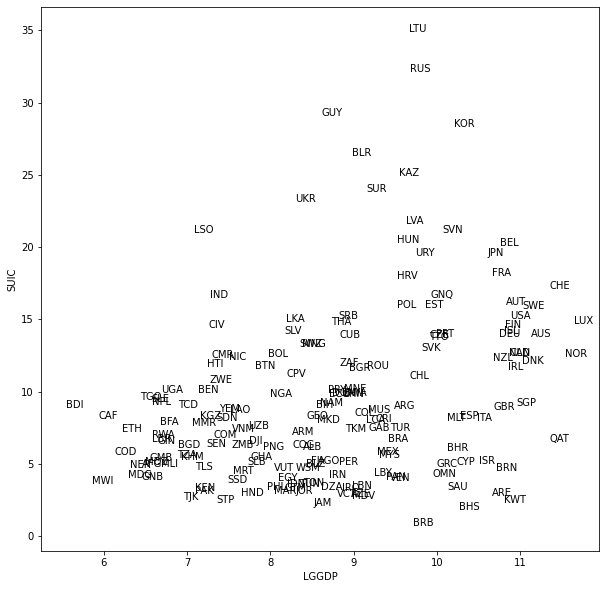

In [6]:
#this block builds scatter-plots
plt.rcParams["figure.figsize"] = [10, 10]
X = df['LGGDP']
y = df['SUIC']
labels = df['CODE']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

ax.set_xlabel('LGGDP') 
ax.set_ylabel('SUIC')

Text(0, 0.5, 'SUIC')

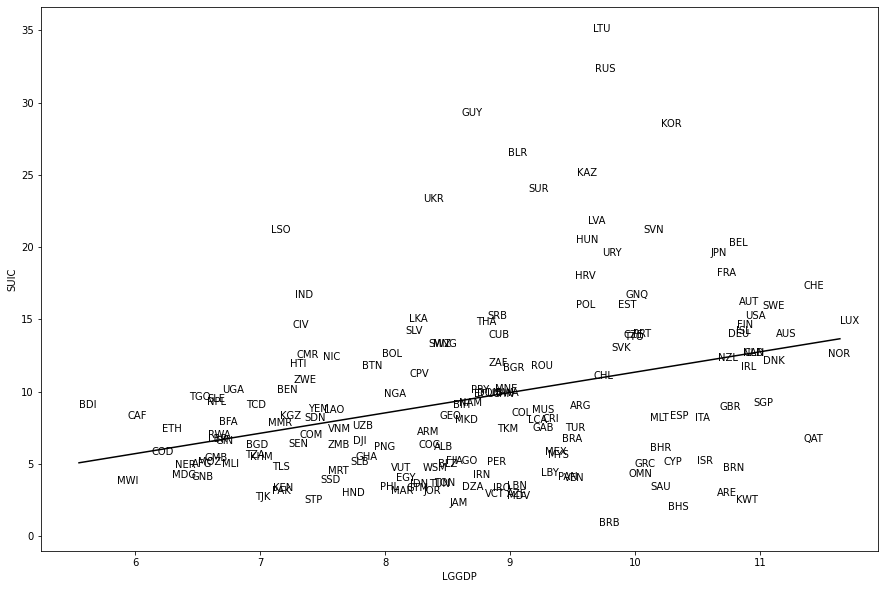

In [7]:
#This block builds scatter-plots with a trendline     
plt.rcParams["figure.figsize"] = [15, 10]
X = df['LGGDP']
y = df['SUIC']
labels = df['CODE']


# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y)

ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

ax.set_xlabel('LGGDP')
ax.set_ylabel('SUIC')

In [8]:
#This block builds a linear regression
fit = smf.ols('SUIC ~ LGGDP + UNMP + URB + C(CLIMATE) + C(COMM)', data=df).fit() 
fit_rob = fit.get_robustcov_results()

print(fit_rob.summary())


                            OLS Regression Results                            
Dep. Variable:                   SUIC   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     11.08
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           3.13e-09
Time:                        20:55:16   Log-Likelihood:                -533.41
No. Observations:                 173   AIC:                             1079.
Df Residuals:                     167   BIC:                             1098.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2876      2.679     

In [29]:
#Thus block performs a test on heteroscedasticity
test = sms.het_goldfeldquandt(fit.resid, fit.model.exog)
print(test)
#"The Null hypothesis is that the variance in the two sub-samples are the same. 
#The alternative hypothesis, can be increasing, i.e. the variance in the second sample is larger
#than in the first, or decreasing or two-sided." 
#The second return is a p-value of the hypothesis that the variance in one subsample is larger than in the other subsample

(0.6661748028766791, 0.9398043019734575, 'increasing')
